<a href="https://colab.research.google.com/github/smeadows2/AI_Class/blob/main/Module_3_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
 
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
 
# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
 
# Common imports
import numpy as np
import os
 
# to make this notebook's output stable across runs
np.random.seed(42)
 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
 
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
 
import tensorflow as tf
from tensorflow import keras
!pip install keras-tuner
import kerastuner as kt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = keras.datasets.boston_housing
(X_train_full, y_train_full), (X_test, y_test) = housing.load_data(test_split=0.2, seed=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
display(housing)

<module 'tensorflow.keras.datasets.boston_housing' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/datasets/boston_housing/__init__.py'>

In [ ]:
display(X_train.shape)
display(X_train)
display(X_train.shape[1:])

(323, 13)

array([[ 0.66654391, -0.48685447,  0.94933319, ...,  0.7953654 ,
        -3.54893886,  1.75301872],
       [-0.4136516 , -0.48685447, -1.13583447, ..., -0.3034891 ,
         0.44185803, -0.98445467],
       [-0.40978216, -0.48685447, -0.08544368, ...,  0.33750936,
         0.38697644, -1.00898156],
       ...,
       [-0.41725152,  3.37688002, -1.3331376 , ..., -0.66977393,
         0.31824126, -1.14796727],
       [-0.40619526, -0.48685447, -0.63902801, ..., -0.25770349,
         0.32836504, -1.1016387 ],
       [ 1.08627116, -0.48685447,  0.94933319, ...,  0.7953654 ,
        -0.05452724,  1.63310948]])

(13,)

In [ ]:
display(X_valid.shape)
display(X_valid)

(81, 13)

array([[-0.40009152, -0.48685447, -0.63902801, ..., -0.25770349,
         0.45080958,  0.16694653],
       [-0.03325199, -0.48685447,  0.94933319, ...,  0.7953654 ,
         0.39155879,  0.04703729],
       [-0.38635811, -0.48685447,  1.48730361, ...,  1.25322144,
         0.45080958,  0.33590955],
       ...,
       [-0.41449322,  0.58640511, -0.93001465, ...,  0.24593815,
         0.43727568, -0.77733872],
       [-0.08621886, -0.48685447,  1.15941135, ..., -1.72284282,
         0.45080958,  1.89336703],
       [ 0.12619868, -0.48685447,  0.94933319, ...,  0.7953654 ,
         0.00738771,  0.65475911]])

In [ ]:
display(X_test.shape)
display(X_test)

(102, 13)

array([[-0.39720297, -0.48685447, -0.11667151, ...,  0.06279574,
         0.38729614,  0.42311627],
       [-0.4060069 , -0.48685447,  0.35600434, ..., -1.12762997,
         0.45080958, -0.90678619],
       [ 0.24781057, -0.48685447,  0.94933319, ...,  0.7953654 ,
         0.45080958,  0.14514485],
       ...,
       [-0.41745993,  2.94757619, -1.33455705, ..., -0.66977393,
         0.38729614, -0.94493913],
       [ 0.69922676, -0.48685447,  0.94933319, ...,  0.7953654 ,
        -2.60817262,  1.40964227],
       [-0.39604374, -0.48685447, -0.40481926, ...,  1.11586462,
        -3.02431355, -0.31269042]])

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
import pandas as pd


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", input_shape=X_train.shape[1:], kernel_initializer="he_normal"),
    #keras.layers.Dense(10, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])


Epoch 1/200
11/11 [==============================] - 0s 12ms/step - loss: 487.9620 - val_loss: 372.1849
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 325.9600 - val_loss: 243.5522
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 204.8895 - val_loss: 137.2578
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 115.6412 - val_loss: 73.0565
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 66.5896 - val_loss: 38.4405
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 41.6016 - val_loss: 24.9178
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 32.2839 - val_loss: 18.6775
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 27.4737 - val_loss: 16.1054
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 24.8763 - val_loss: 15.2334
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 23.4997 -

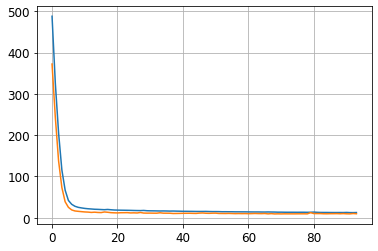

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
def model_builder(hp):
  model = keras.Sequential()

  hp_units = hp.Int('units', min_value=5, max_value=55, step=5)
  model.add(keras.layers.Dense(units=hp_units, activation="elu", input_shape=X_train.shape[1:], kernel_initializer="he_normal")) #maybe do steps for learning rate
  #hp_units2 = hp.Int('units', min_value=5, max_value=55, step=5)
  #model.add(keras.layers.Dense(units=hp_units2, activation="elu", kernel_initializer="he_normal"))
  #hp_units3 = hp.Int('units', min_value=5, max_value=55, step=5)
  #model.add(keras.layers.Dense(units=hp_units3, activation="elu", kernel_initializer="he_normal"))
  model.add(keras.layers.Dense(1))

  #hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-3, 5e-4, 1e-4])
  #hp_learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.0101, step=0.0001, default=1e-3)

  model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=6e-4)) #hp_learning_rate #1e-3 #6e-4

  return model


keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

tuner = kt.Hyperband(model_builder, objective='val_loss', max_epochs=200, factor=3, seed=42)

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

tuner.search(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}.
""")

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 40.



In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid)) #, callbacks=[early_stopping_cb]

val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/200
11/11 [==============================] - 0s 13ms/step - loss: 422.8892 - val_loss: 180.5013
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 121.7503 - val_loss: 58.6642
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 50.9544 - val_loss: 33.9128
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 38.1170 - val_loss: 23.3572
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 33.1411 - val_loss: 24.0820
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 30.5766 - val_loss: 18.0889
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 27.8081 - val_loss: 16.3638
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 26.1567 - val_loss: 15.2649
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 24.6530 - val_loss: 15.0273
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 23.5030 - val

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_data=(X_valid, y_valid))

Epoch 1/151
11/11 [==============================] - 0s 14ms/step - loss: 442.4562 - val_loss: 247.3272
Epoch 2/151
11/11 [==============================] - 0s 3ms/step - loss: 183.7958 - val_loss: 115.9199
Epoch 3/151
11/11 [==============================] - 0s 3ms/step - loss: 81.7335 - val_loss: 45.7830
Epoch 4/151
11/11 [==============================] - 0s 3ms/step - loss: 46.8758 - val_loss: 28.4094
Epoch 5/151
11/11 [==============================] - 0s 4ms/step - loss: 36.3847 - val_loss: 22.0989
Epoch 6/151
11/11 [==============================] - 0s 3ms/step - loss: 31.2363 - val_loss: 18.3207
Epoch 7/151
11/11 [==============================] - 0s 3ms/step - loss: 27.9796 - val_loss: 15.9487
Epoch 8/151
11/11 [==============================] - 0s 4ms/step - loss: 25.3958 - val_loss: 14.0618
Epoch 9/151
11/11 [==============================] - 0s 3ms/step - loss: 23.3753 - val_loss: 13.2701
Epoch 10/151
11/11 [==============================] - 0s 3ms/step - loss: 22.0933 - va

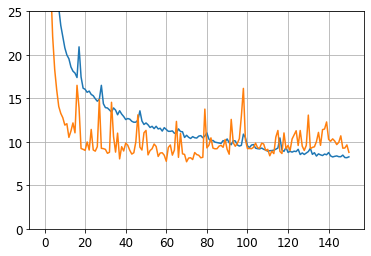

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 25)
plt.show()